In [1]:
import numpy as np
import pandas as pd
import scipy as stats
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/pima-indians-diabetes.csv')

In [3]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


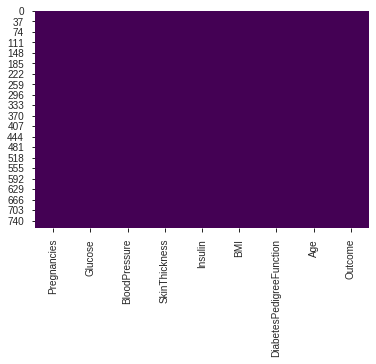

In [4]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
import time

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
x=data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [8]:
y=data['Outcome']

In [9]:
#model
x_trine,x_test,y_trine,y_test=train_test_split(x,y,test_size=0.15,random_state=25)

In [10]:
x_trine.shape

(652, 8)

In [11]:
y_trine.shape

(652,)

In [12]:
x_test.shape

(116, 8)

In [13]:
y_test.shape

(116,)

In [14]:
model=LogisticRegression(solver='lbfgs',max_iter=400)
model.fit(x_trine,y_trine)
y_predict=model.predict(x_test)

In [15]:
trine_score=model.score(x_trine,y_trine)
trine_score

0.7760736196319018

In [16]:
test_score=model.score(x_test,y_test)
test_score

0.7672413793103449

In [17]:
pd.DataFrame({'actual':y_test,'new_predict':y_predict})

,actual,new_predict
459,0,1
39,1,1
344,0,0
84,1,1
700,0,0
...,...,...
558,0,1
553,0,0
315,0,0
1,0,0


In [18]:
from sklearn.feature_selection import RFE
model=LogisticRegression(solver='lbfgs',max_iter=500)
rfe=RFE(model,5,verbose=1)
rfe=rfe.fit(x,y)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [19]:
rfe.support_

array([ True,  True, False, False, False,  True,  True,  True])

In [20]:
XX = x[x.columns[rfe.support_]]
XX

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,6,148,33.6,0.627,50
1,1,85,26.6,0.351,31
2,8,183,23.3,0.672,32
3,1,89,28.1,0.167,21
4,0,137,43.1,2.288,33
...,...,...,...,...,...
763,10,101,32.9,0.171,63
764,2,122,36.8,0.340,27
765,5,121,26.2,0.245,30
766,1,126,30.1,0.349,47


In [21]:
x_train, x_test, y_train, y_test = train_test_split(XX, y, test_size = 0.30, random_state = 8, stratify = y)

In [22]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [25]:
trine_score=model.score(x_train, y_train)
trine_score

0.7877094972067039

In [26]:
test_score=model.score(x_test,y_test)
test_score

0.7359307359307359

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [28]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [29]:
y_predict_prob = model.predict_proba(x_test)[:, 1]

In [30]:
[fpr, tpr, thr] = roc_curve(y_test, y_predict_prob)

In [31]:
print('Accuracy: ', accuracy_score(y_test, y_predict))
print('log loss: ', log_loss(y_test, y_predict_prob))
print('auc: ', auc(fpr, tpr))


Accuracy:  0.7359307359307359
log loss:  0.5584731711054506
auc:  0.7779423868312756


In [32]:
idx = np.min(np.where(tpr>0.95))
idx

80

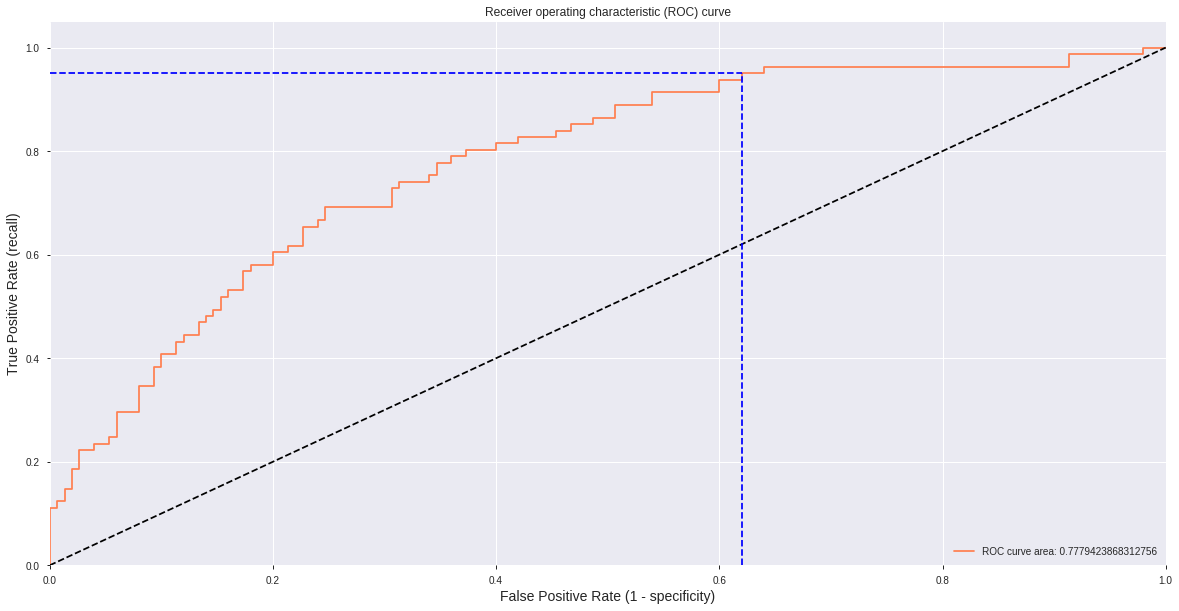

Using a threshold of 0.114 guarantees a sensitivity of 0.951 and a specificity of 0.380, i.e. a false positive rate of 62.00%.


In [33]:
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, color = 'coral', label = "ROC curve area: " + str(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))